## Importing Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
#Loading the data
df= pd.read_csv('insurance_data.csv')

## Data Preprocessing and Exploration

In [61]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [62]:
df.shape

(1340, 11)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


PatientID data type int (should be an object) and Age is float (should be int)

In [64]:

#Checking for missing values
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

The number of null values for PatientID, age and region are insignificant so we drop them.

In [65]:
#Dropping Null values for PatientID, age, region
df.dropna(subset=['PatientID','age','region'], inplace=True)
df.isna().sum(0)

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [66]:
#Changing data types of PatientID and age
df['PatientID']= df['PatientID'].astype('object')
df['age']= df['age'].astype('int')

In [67]:
data= df.copy(deep=True)

In [68]:
#Descriptive Statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1332.0,673.474474,384.703785,0.00,340.7500,673.500,1006.2500,1339.00
age,1332.0,38.086336,11.112804,18.00,29.0000,38.000,47.0000,60.00
bmi,1332.0,30.658333,6.118967,16.00,26.2000,30.350,34.7250,53.10
bloodpressure,1332.0,94.189189,11.445173,80.00,86.0000,92.000,99.0000,140.00
children,1332.0,1.099850,1.205958,0.00,0.0000,1.000,2.0000,5.00
claim,1332.0,13325.246426,12109.620712,1121.87,4760.1575,9412.965,16781.3275,63770.43


In [69]:
#Descriptive statitistics for categorical variables
data.describe(include='object').T

,count,unique,top,freq
PatientID,1332,1332,1340,1
gender,1332,2,male,670
diabetic,1332,2,No,695
smoker,1332,2,No,1058
region,1332,4,southeast,442


In [70]:
#Checking for duplicates
data.duplicated().sum()

np.int64(0)

There are no duplicates in the data.

In [71]:
#Dropping irrelevant columns like PatientID and index
data1= data.copy(deep=True)
data1.drop(['PatientID', 'index'], axis=1, inplace=True)

In [72]:
#Grouping into categorical and numerical data

numerical_cols= data1.select_dtypes(include=[np.number]).columns
categorical_cols= data1.select_dtypes(exclude=[np.number]).columns

numerical_data= data1[numerical_cols]
categorical_data= data1[categorical_cols]

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

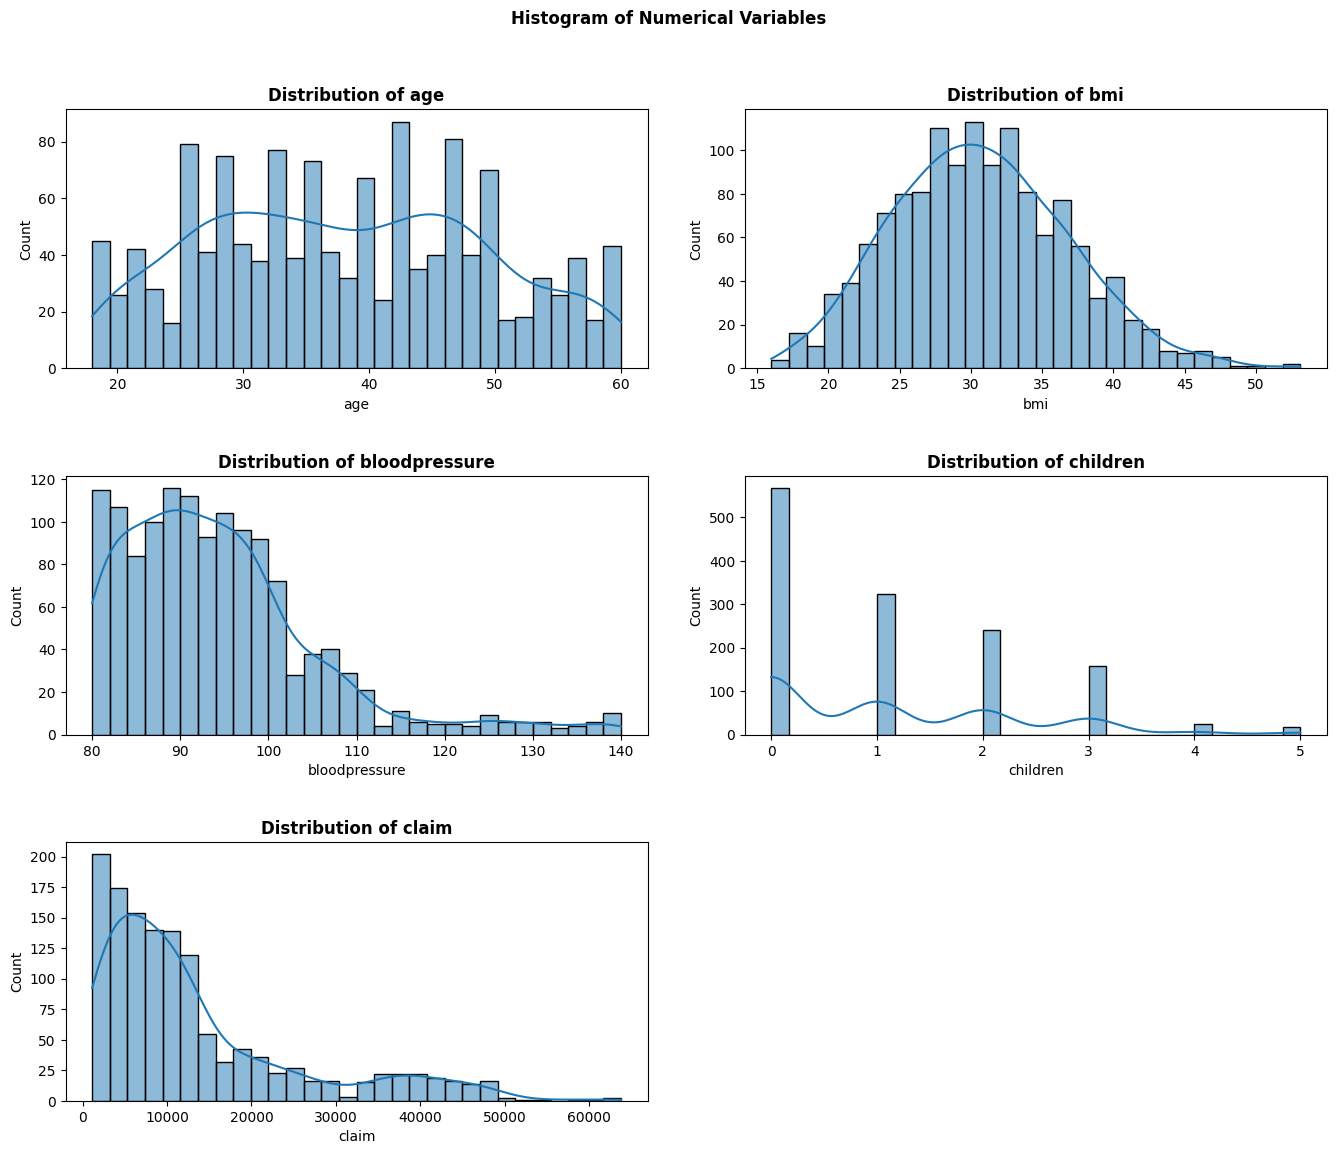

In [73]:
#Distribution plot of numerical variables

plt.figure(figsize=(14,12))
plt.suptitle("Histogram of Numerical Variables", fontweight='bold')

for i, col in enumerate(numerical_data):
    plt.subplot(3,2, i+1)
    sns.histplot(numerical_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontweight='bold')
    plt.tight_layout(pad=3)

The distribution plots show that:

a. Ages of individuals are uniformly distributed

b. bmi is normally distributed

c. bloodpressure & claims have higher positive skewness (right-skwed)

d. majority of the individuals have no children

In [74]:
#Value counts for each unique element in each column

for i, col in enumerate(categorical_data):
    print(f"{categorical_data[col].value_counts()}")

gender
male      670
female    662
Name: count, dtype: int64
diabetic
No     695
Yes    637
Name: count, dtype: int64
smoker
No     1058
Yes     274
Name: count, dtype: int64
region
southeast    442
northwest    345
southwest    314
northeast    231
Name: count, dtype: int64


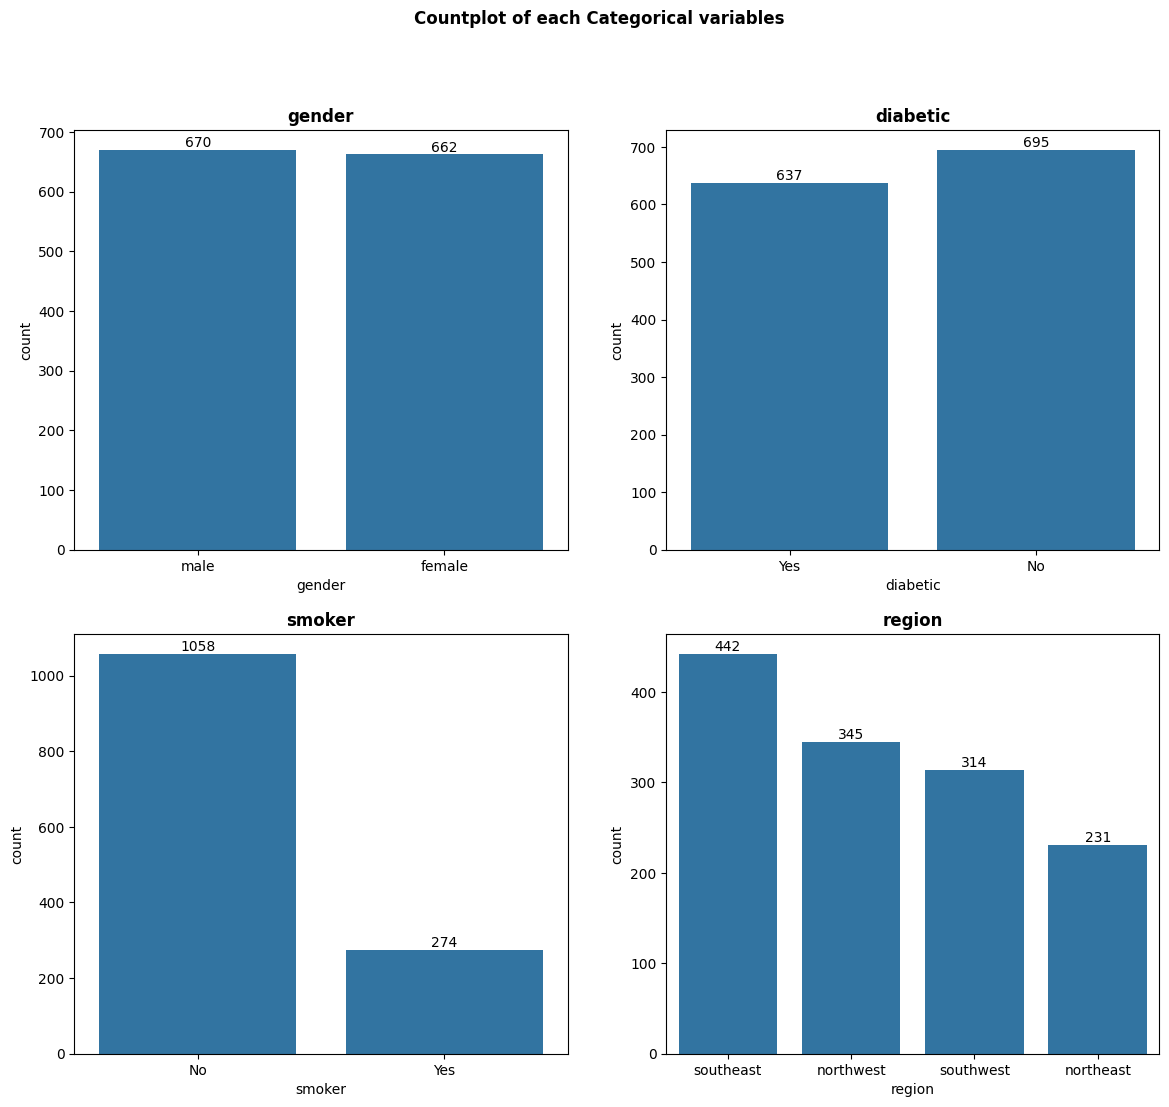

In [75]:
#Univariate analysis of categorical variables

plt.figure(figsize=(14,12))
plt.suptitle("Countplot of each Categorical variables", fontweight='bold')


for i, col in enumerate(categorical_data):
    plt.subplot(2,2,i+1)
    ax=sns.countplot(x=categorical_data[col])
    ax.bar_label(ax.containers[0])
    plt.title(f"{col}", fontweight='bold')

#### Bivariate Analysis

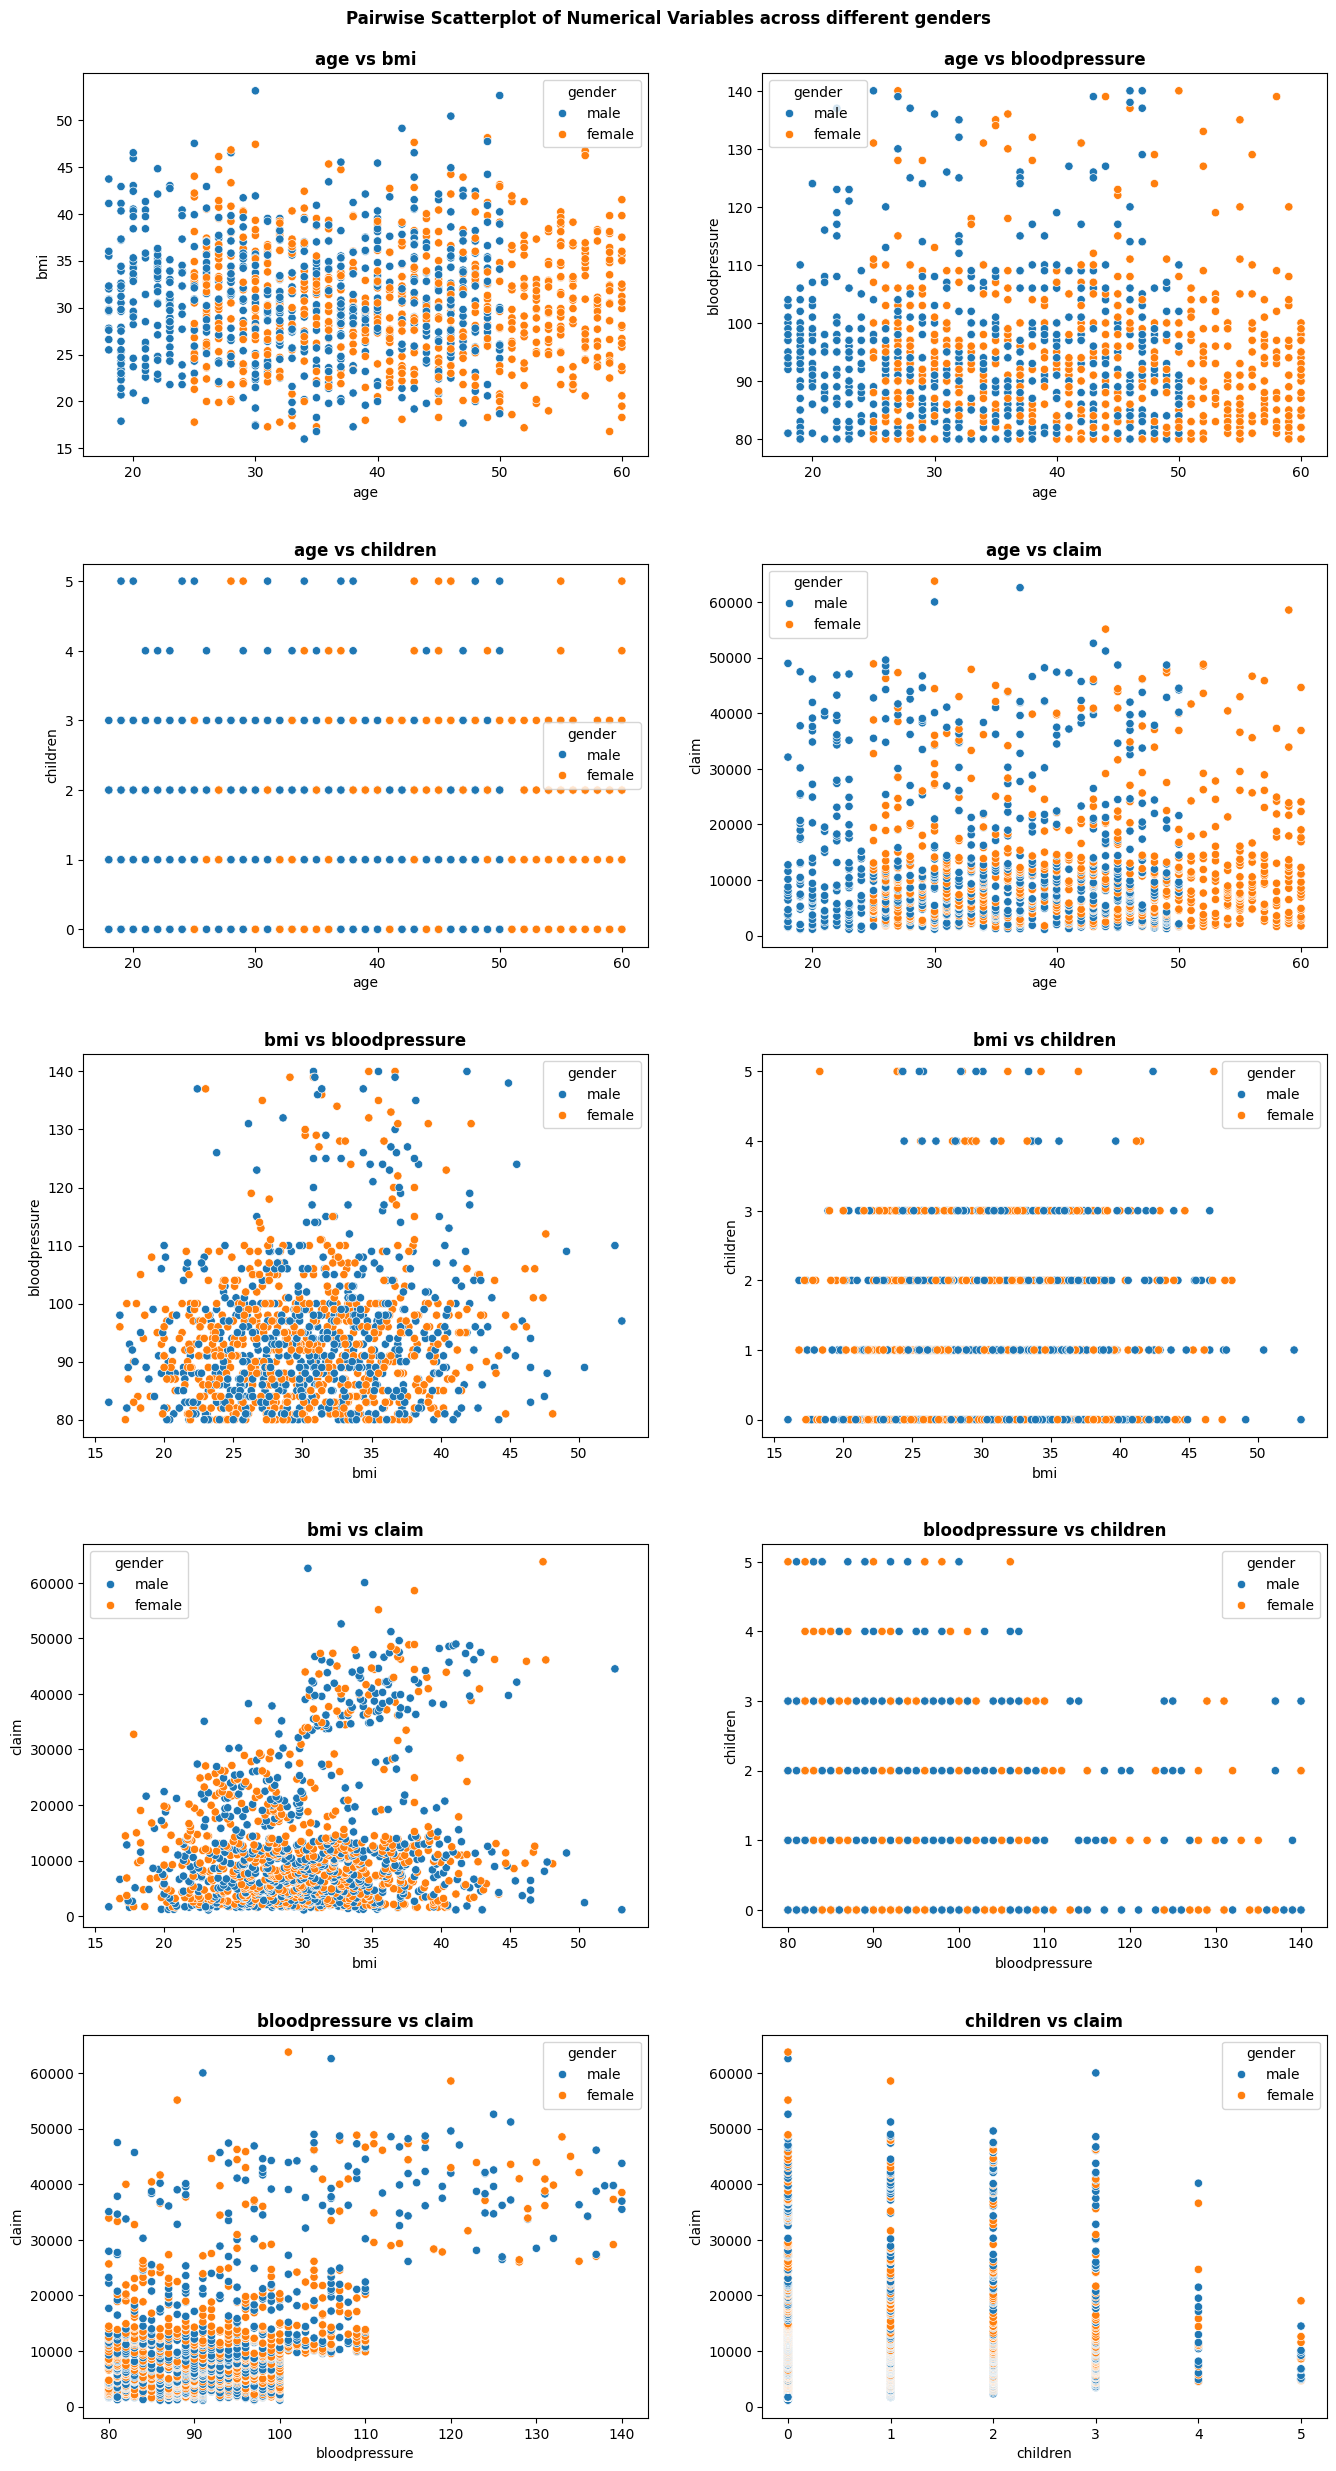

In [76]:
#Scatter plot Numerical Variable vs Numerical variable

plt.figure(figsize=(14,30))
plt.suptitle("Pairwise Scatterplot of Numerical Variables across different genders", fontweight='bold')

plot_idx= 1
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.subplot(6,2, plot_idx)
        sns.scatterplot(x= numerical_data[numerical_cols[i]], y=numerical_data[numerical_cols[j]], hue=categorical_data['gender'])
        plt.title(f"{numerical_cols[i]} vs {numerical_cols[j]}", fontweight='bold')
        plot_idx +=1

plt.tight_layout(pad=3)


The plots show that there's some form of correlation between bmi/bloodpressure, bmi/claim, claim/bloodpressure. All other pairwise plots show no correlation at all. Also it is clear that the older class in the data are females. 

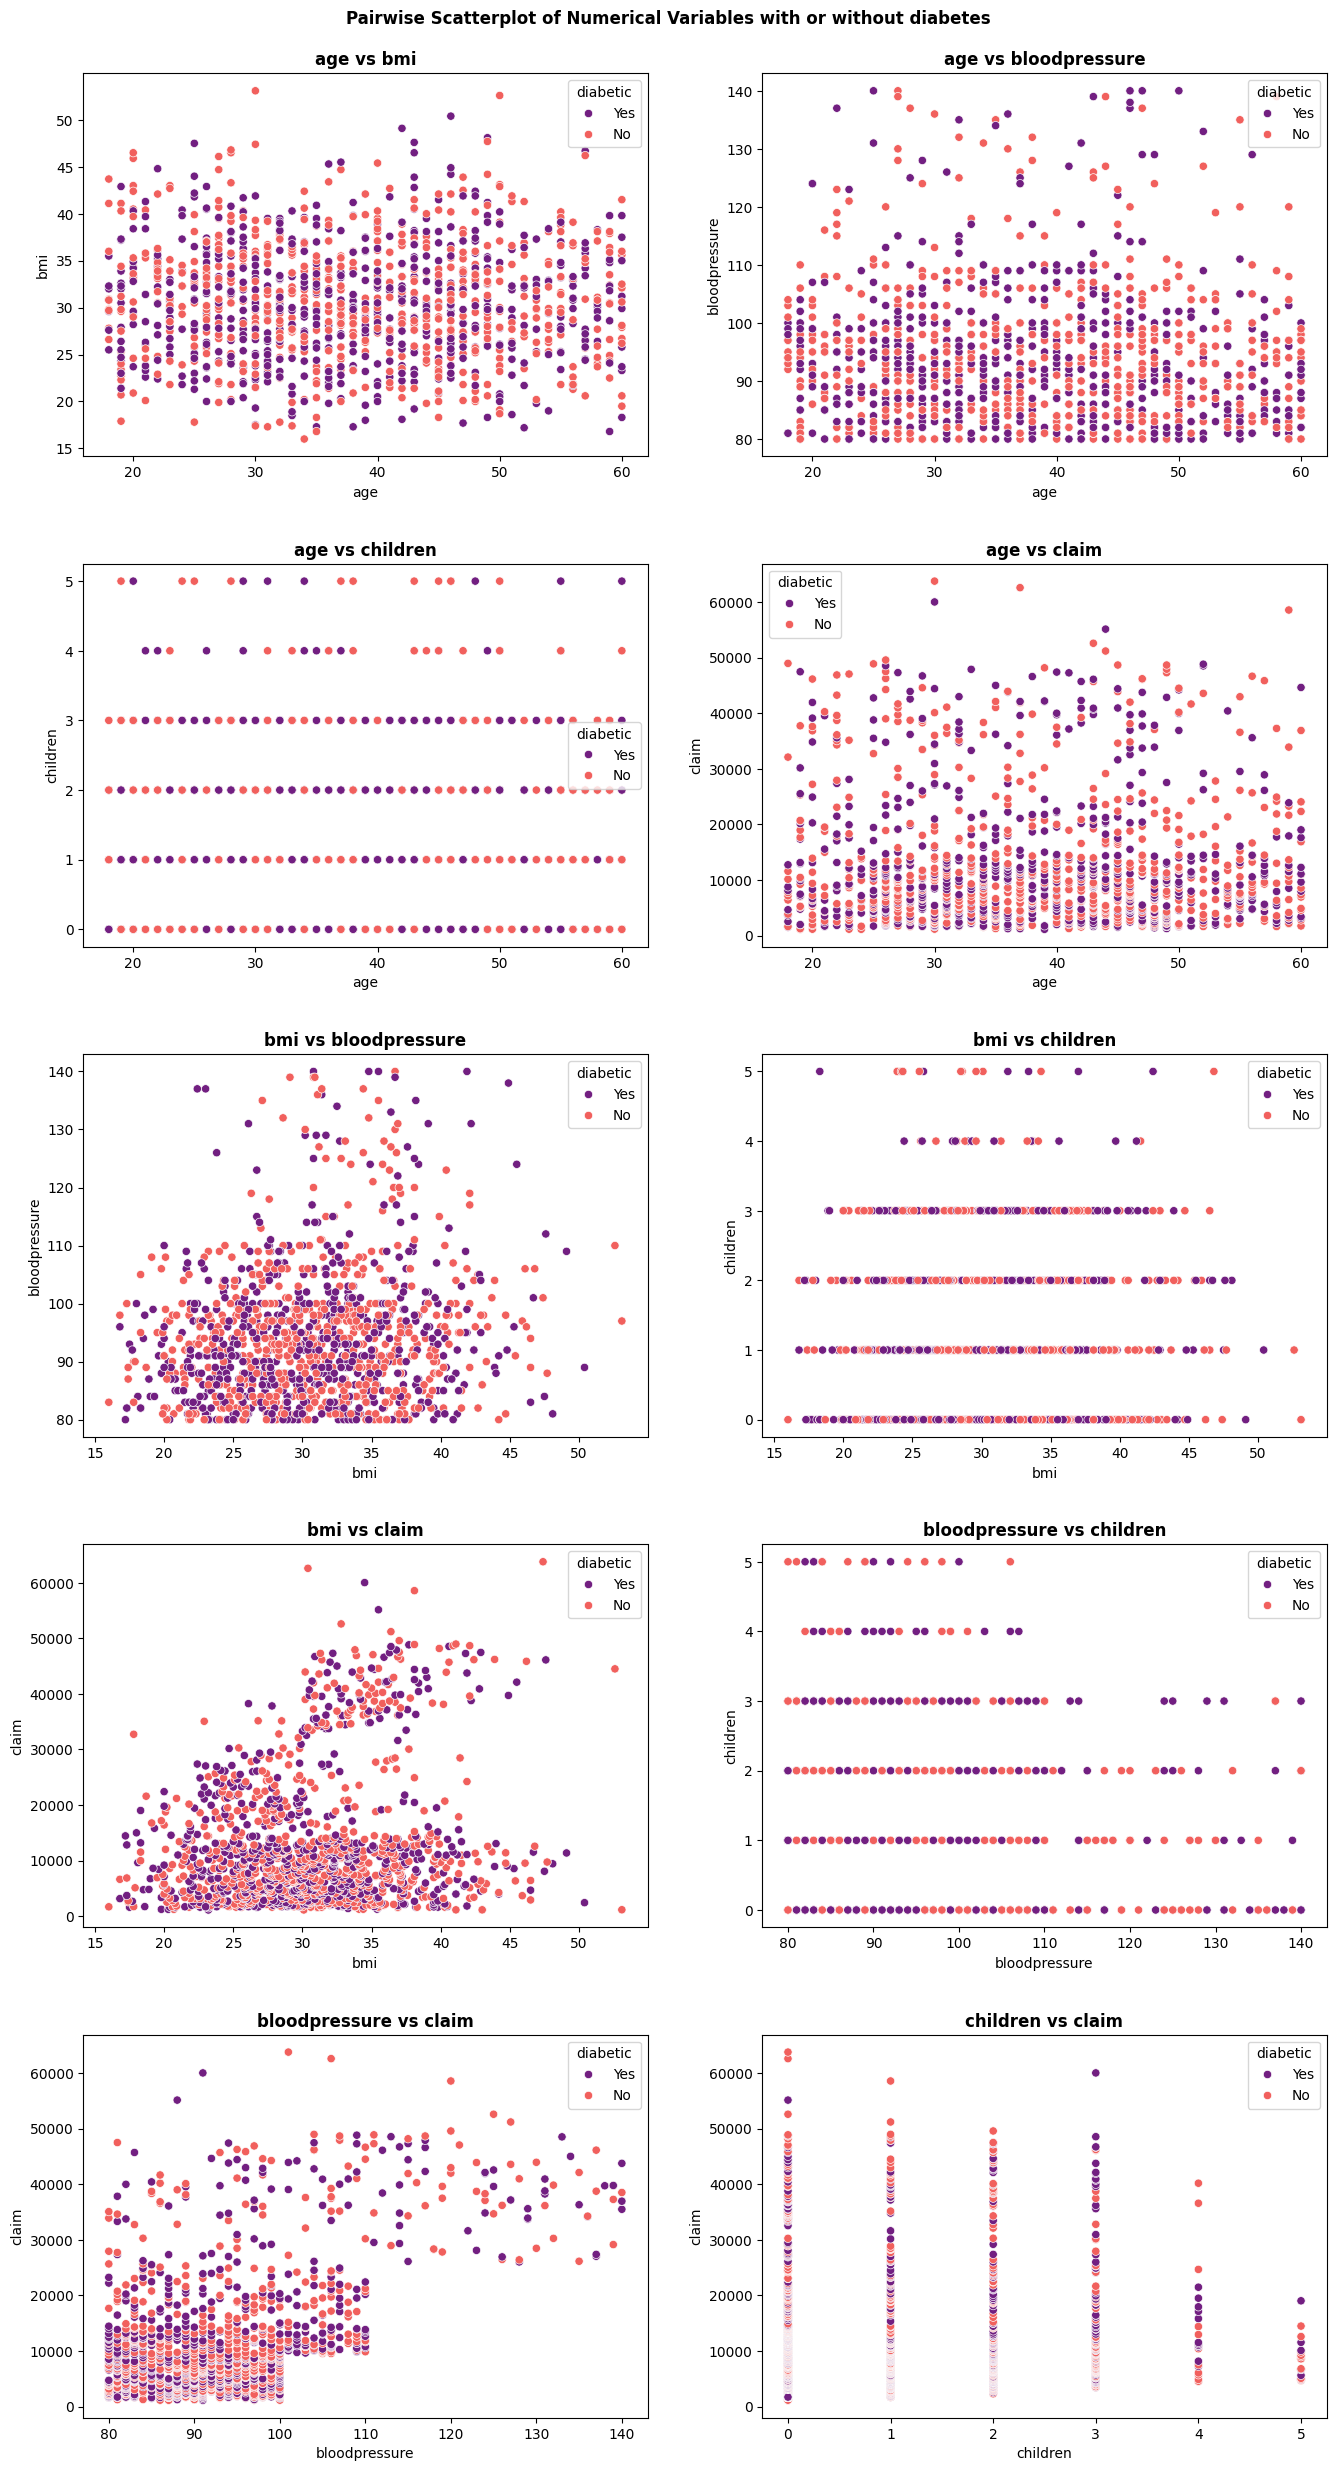

In [77]:
plt.figure(figsize=(14,30))
plt.suptitle("Pairwise Scatterplot of Numerical Variables with or without diabetes", fontweight='bold')
plot_idx=1

for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.subplot(6,2, plot_idx)
        sns.scatterplot(x= numerical_data[numerical_cols[i]], y=numerical_data[numerical_cols[j]], hue=categorical_data['diabetic'], palette="magma")
        plt.title(f"{numerical_cols[i]} vs {numerical_cols[j]}", fontweight='bold')
        
        plot_idx +=1
plt.tight_layout(pad=3)

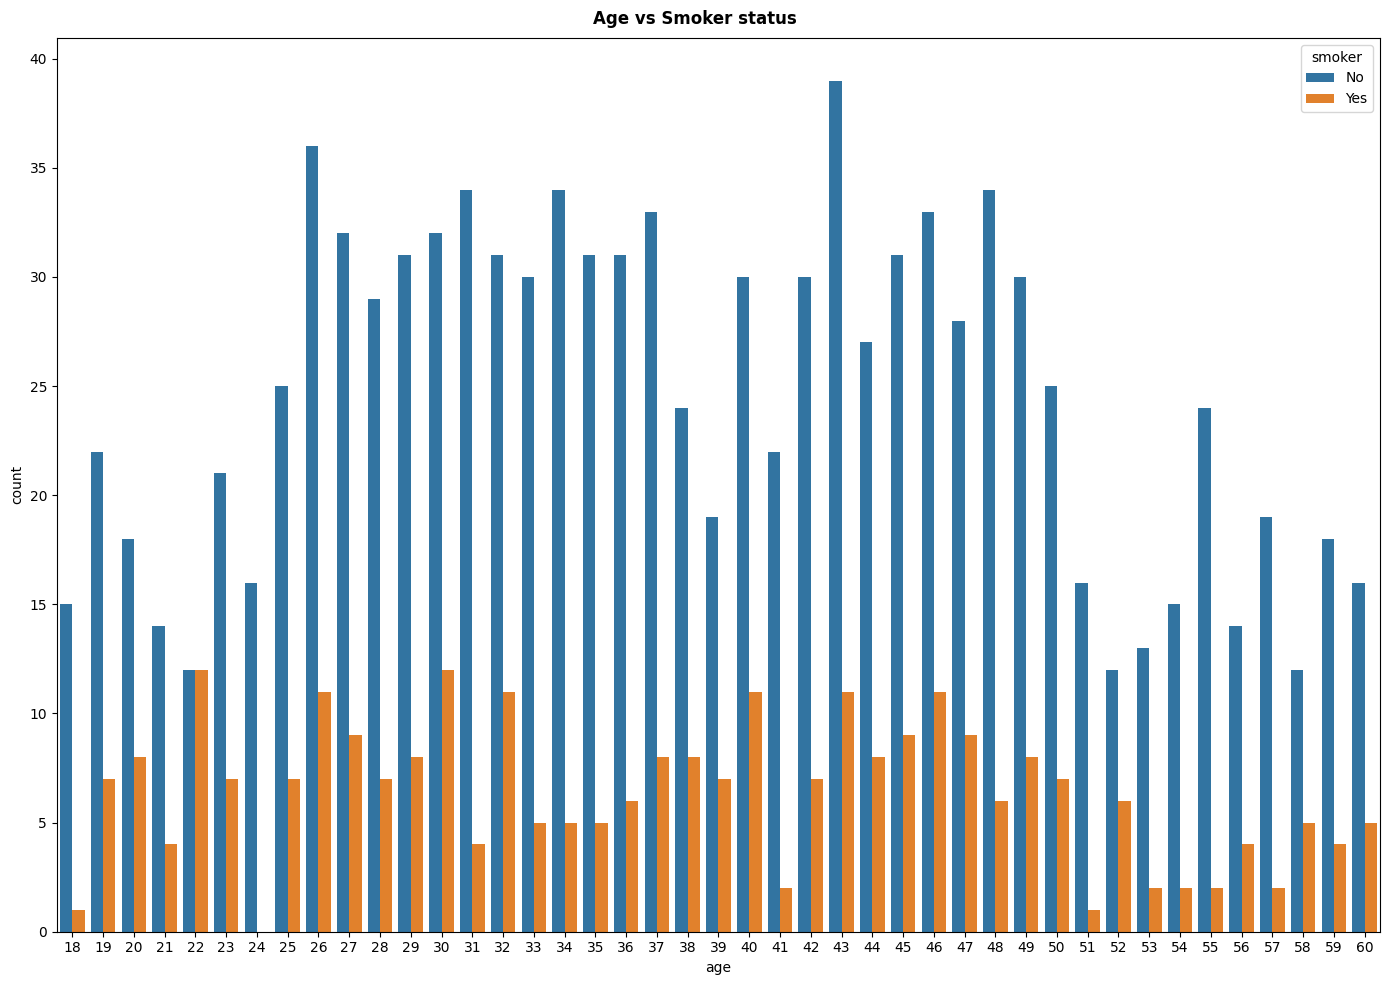

In [78]:
#Categorical Variables Vs Numerical Variables

plt.figure(figsize=(14,10))
plt.suptitle("Age vs Smoker status", fontweight='bold')
sns.countplot(x=numerical_data['age'], hue=categorical_data['smoker'])
plt.tight_layout()

We can observe that:
a. individuals aged of 43 have the highest number of non-smokers

b. age 30 has the highest number of smokers 

c. age 22 has equal number of smokers and non-smokers 

d. ages 18 and 51 have the lowest number of smokers.

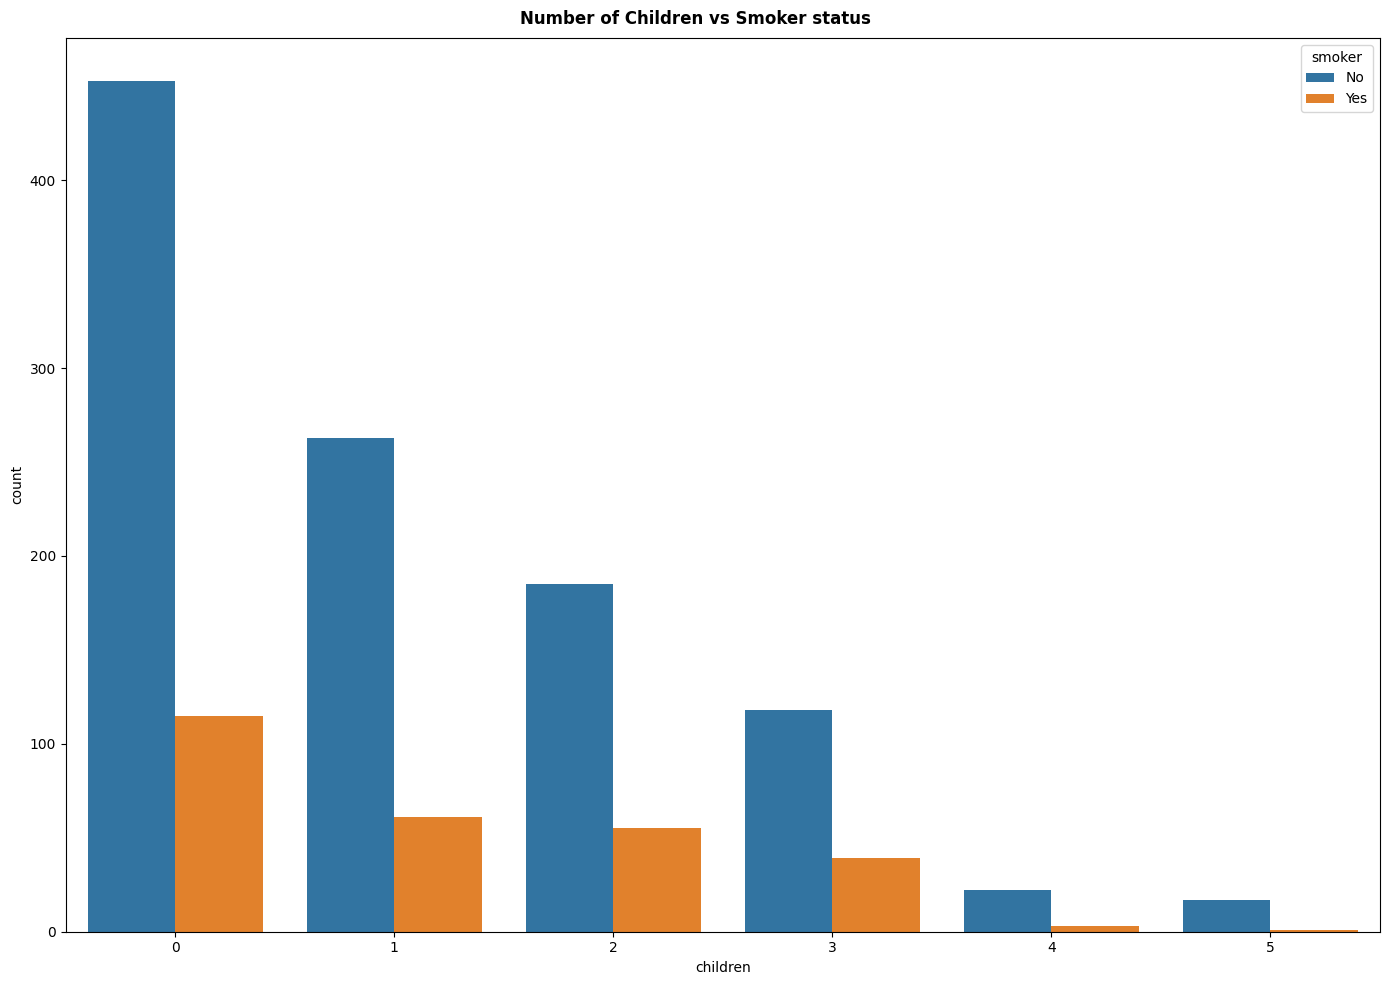

In [79]:
plt.figure(figsize=(14,10))
plt.suptitle("Number of Children vs Smoker status", fontweight='bold')
sns.countplot(x=numerical_data['children'], hue=categorical_data['smoker'])
plt.tight_layout()

People with no children smoke more and people with 5 children smoke less. Same trend appears for non-smokers.

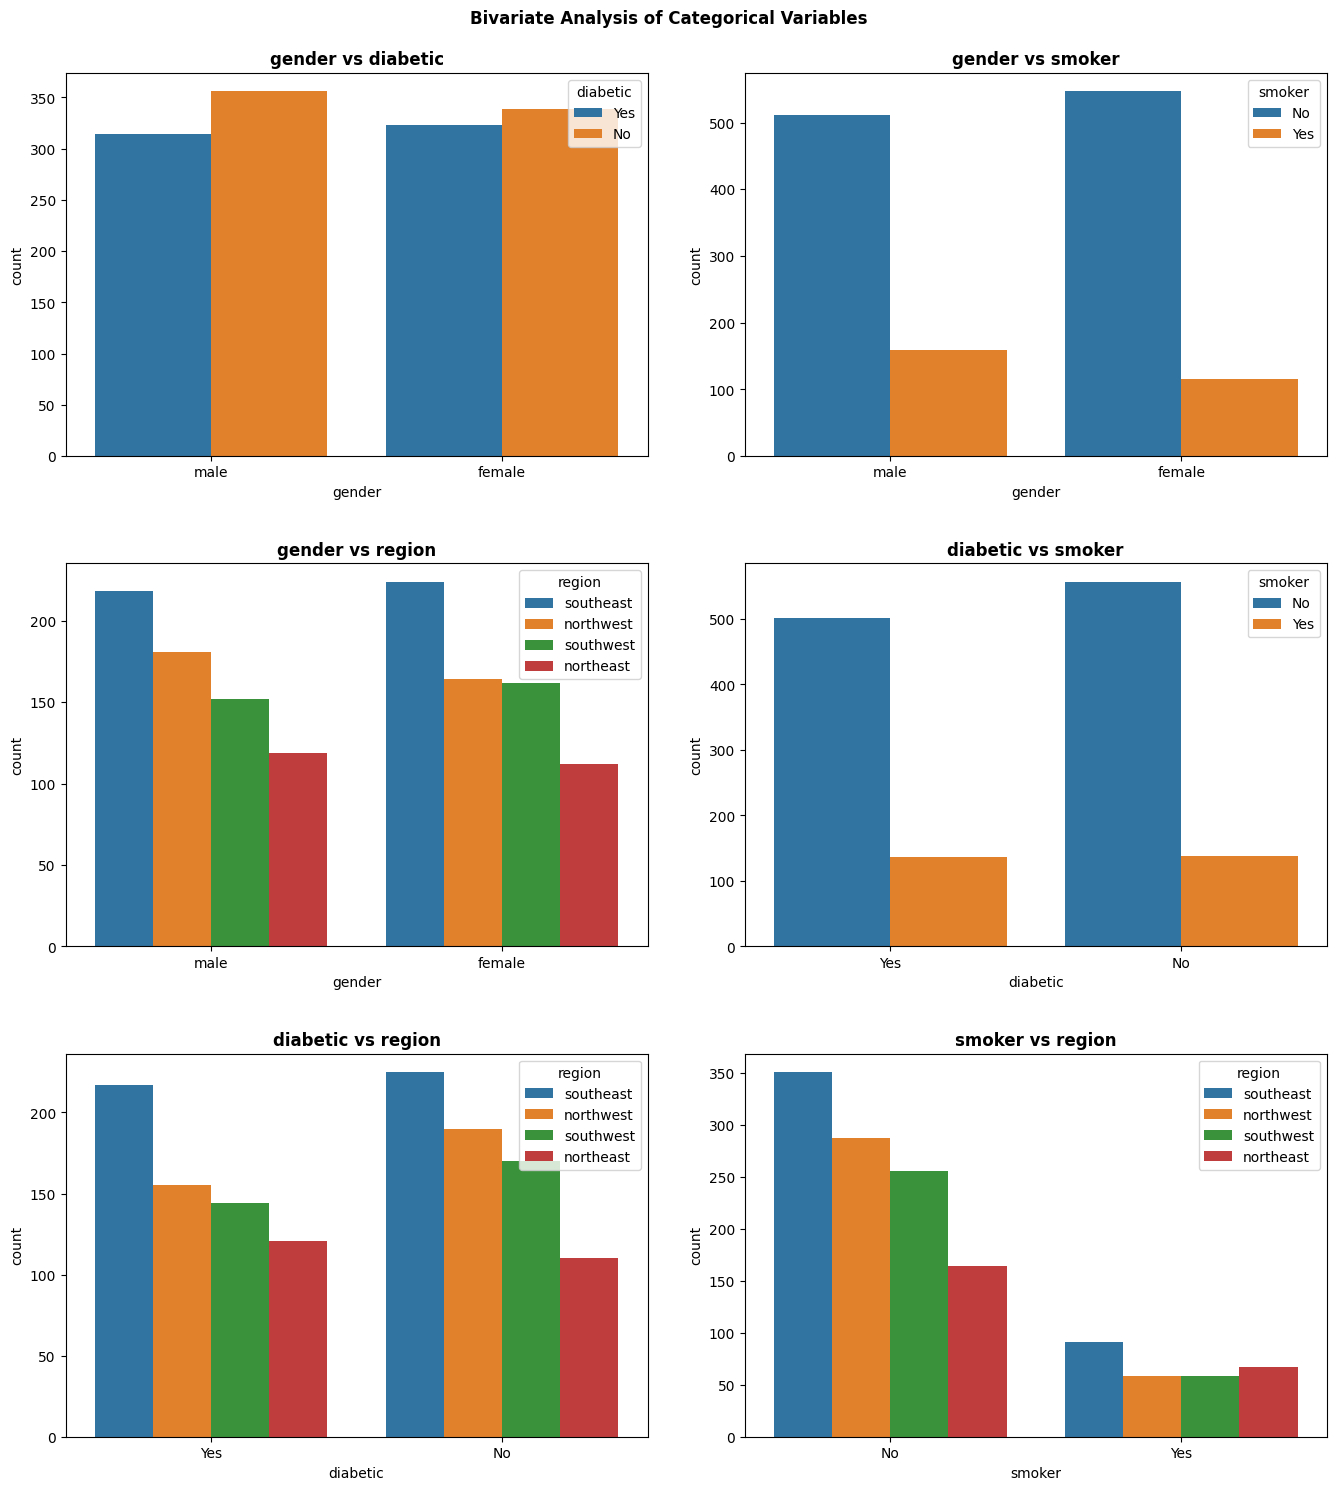

In [80]:
#Categorical Variable vs Categorical Variable

plt.figure(figsize=(14,30))
plt.suptitle("Bivariate Analysis of Categorical Variables", fontweight='bold')
plot_idx=1
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        plt.subplot(6,2, plot_idx)
        sns.countplot(x=categorical_data[categorical_cols[i]], hue=categorical_data[categorical_cols[j]])
        plt.title(f"{categorical_cols[i]} vs {categorical_cols[j]}", fontweight='bold')
        plot_idx +=1
plt.tight_layout(pad=3)
plt.show()

From the plots above:

a. More males are non-diabetic than females with virtually equal number of diabetic for both gender groups.

b. More males smoke than females.

c. Almost equal number of smokers for those who are diabetic and non-diabetic.

d. People in the southeast region smoke and are more diabetic than other regions. 

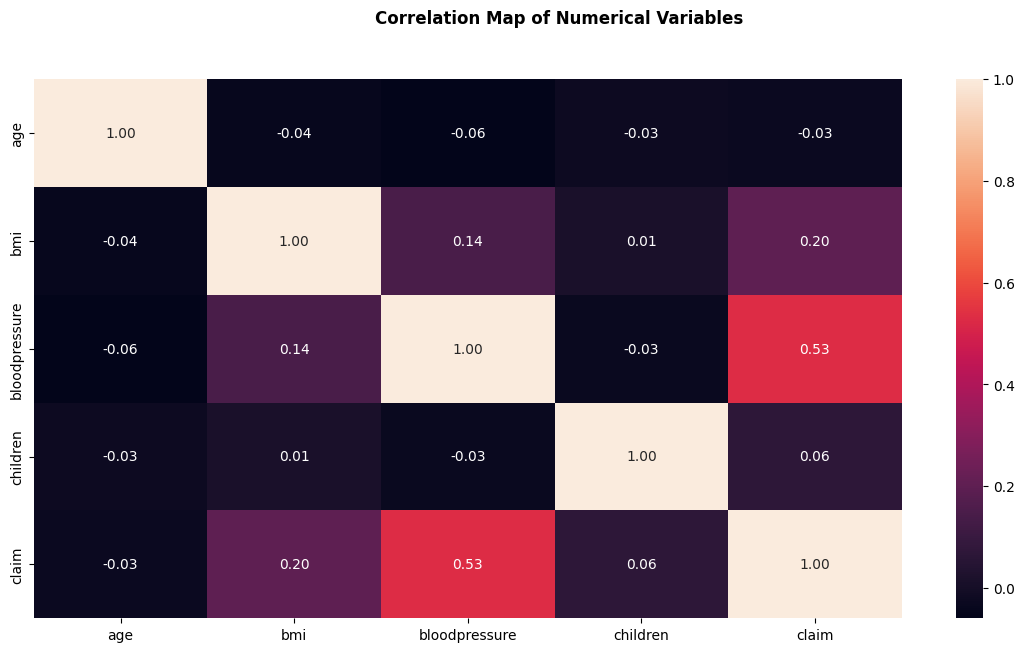

In [81]:
#Correlation Heatmap

plt.figure(figsize=(14,7))
plt.suptitle("Correlation Map of Numerical Variables", fontweight='bold')
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f")
plt.show()

#### Detection and Removal of Outliers

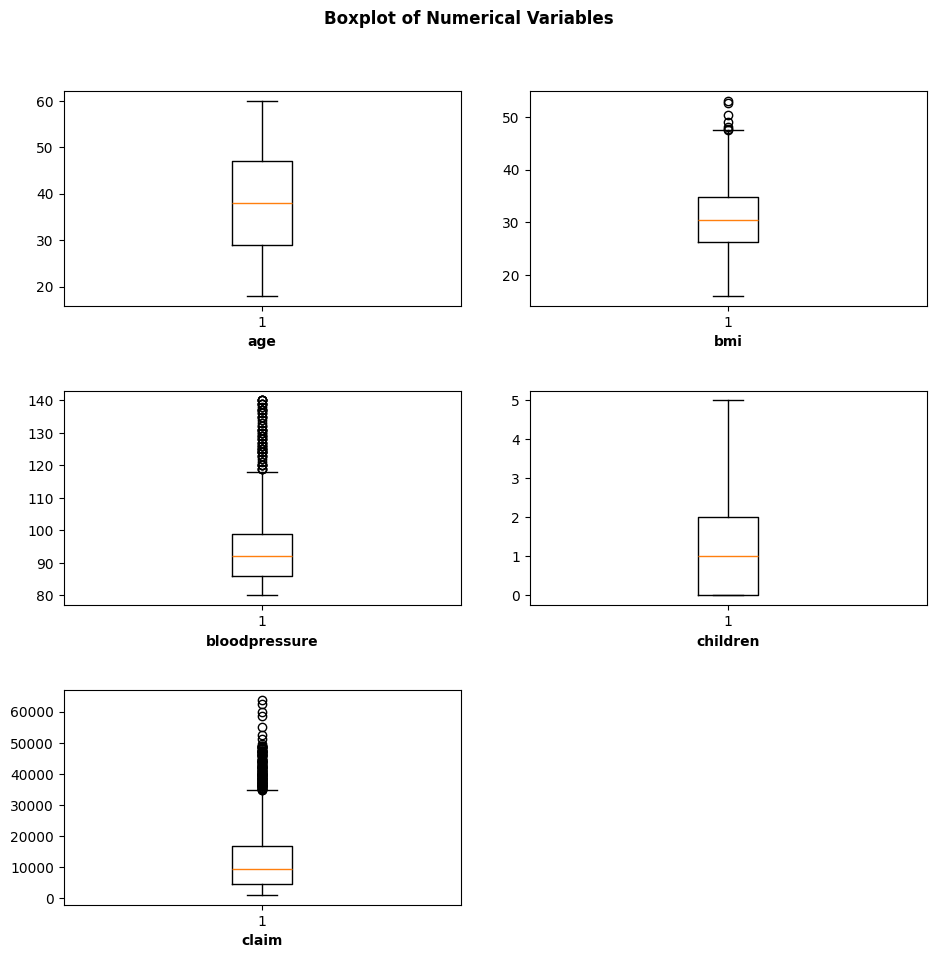

In [82]:
#Boxplot of Numerical Variables

plt.figure(figsize=(10,10))
plt.suptitle("Boxplot of Numerical Variables", fontweight='bold')
for i, col in enumerate(numerical_data):
    plt.subplot(3,2, i+1)
    plt.boxplot(numerical_data[col])
    plt.xlabel(f"{col}", fontweight='bold')
    plt.tight_layout(pad=3)

The outliers in bmi and bloodpressure are stacked to one another and as such we can include them in the analysis since they do not signifcantly deviate from the other data points in these variables. However, the dependent variable claim, shows show significant number of outliers at the upper end of the box plot and need to be removed.

In [83]:
#Getting outliers from claims

def get_outliers(df, col):
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    
    iqr= Q3 - Q1
    lower = Q1 - 1.5*iqr
    upper = Q3 + 1.5*iqr
    
    outliers= df[(df[col]<lower) | (df[col]>upper)]
    sum_of_outliers= len(outliers)
    return outliers, sum_of_outliers

    

In [84]:
get_outliers(numerical_data, 'claim')

(      age   bmi  bloodpressure  children     claim
 1205   20  34.9            124         0  34828.65
 1206   46  31.4            111         0  34838.87
 1207   22  22.9             80         0  35069.37
 1208   23  28.5            106         0  35147.53
 1209   32  26.8            107         1  35160.13
 ...   ...   ...            ...       ...       ...
 1335   44  35.5             88         0  55135.40
 1336   59  38.1            120         1  58571.07
 1337   30  34.5             91         3  60021.40
 1338   37  30.4            106         0  62592.87
 1339   30  47.4            101         0  63770.43
 
 [135 rows x 5 columns],
 135)

There are 139 outliers in the dependent variable (claim)

In [85]:
#Removing outliers from claims

def remove_outliers(df, col):
    df= df.copy(deep=True)
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    
    iqr= Q3 - Q1
    lower = Q1 - 1.5*iqr
    upper = Q3 + 1.5*iqr
    outliers= ((df[col]< lower) | (df[col]> upper))
    outlier_indices= df.index[outliers]
    df= df.drop(outlier_indices, axis=0).reset_index(drop=True)
    
    return df, outlier_indices
    

In [86]:
#Cleaning numerical data
num_data= numerical_data.copy(deep=True)
cleaned_num_data, outlier_indices= remove_outliers(numerical_data, 'claim')

In [87]:
#Cleaning categorical data using indices from cleaned numerical data
cat_data= categorical_data.copy(deep=True)
cleaned_cat_data= cat_data.drop(outlier_indices).reset_index(drop=True)

In [88]:
#Concatenating the Cleaned numeical and categorical data
new_data= pd.concat([cleaned_num_data, cleaned_cat_data], axis=1)
new_data

,age,bmi,bloodpressure,children,claim,gender,diabetic,smoker,region
0,39,23.2,91,0,1121.87,male,Yes,No,southeast
1,24,30.1,87,0,1131.51,male,No,No,southeast
2,19,41.1,100,0,1146.80,male,No,No,northwest
3,20,43.0,86,0,1149.40,male,No,No,northwest
4,30,53.1,97,0,1163.46,male,No,No,northwest
...,...,...,...,...,...,...,...,...,...
1192,40,32.7,98,0,34472.84,male,No,Yes,southwest
1193,45,33.5,81,0,34617.84,male,No,Yes,northeast
1194,32,31.7,125,0,34672.15,male,No,Yes,southeast
1195,26,34.8,94,0,34779.62,male,Yes,Yes,southwest


## Model Development

### Feature Scaling and Encoding

In [89]:
#Creating initial train and test sets
X= new_data.drop(['claim'], axis=1)
y= new_data['claim']

Xtrain_init, Xtest_init, ytrain_init, ytest_init = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
#Splitting the categorical and numerical variables for the Xtrain and Xtests for standardization and encoding
xtrain_num= Xtrain_init[Xtrain_init.select_dtypes(include=[np.number]).columns]
xtrain_cat= Xtrain_init[Xtrain_init.select_dtypes(exclude=[np.number]).columns]

xtest_num= Xtest_init[Xtest_init.select_dtypes(include=[np.number]).columns]
xtest_cat= Xtest_init[Xtest_init.select_dtypes(exclude=[np.number]).columns]

In [91]:
#Standarding numerical variables of Xtrain and Xtests
scaler_x= StandardScaler()

#Train Sets
xtrain_num_scaled= scaler_x.fit_transform(xtrain_num)


#Test Sets
xtest_num_scaled= scaler_x.transform(xtest_num)


In [92]:
# #Standardizing numerical variables for ytrain and ytests
# scaler_y= StandardScaler()

# ytrain_init_scaled= scaler_y.fit_transform(ytrain_init.values.reshape(-1,1))
# ytest_init_scaled= scaler_y.transform(ytest_init.values.reshape(-1,1))

In [93]:
#Encoding Categorical variables of the Xtrain and xtest

label_encoders={}
#Xtrain
xtrain_cat_encoded= pd.DataFrame()
for col in xtrain_cat.columns:
    le= LabelEncoder()
    xtrain_cat_encoded[col]= le.fit_transform(xtrain_cat[col])
    label_encoders[col] = le

#Xtest
xtest_cat_encoded= pd.DataFrame()
for col in xtest_cat.columns:
    xtest_cat_encoded[col] = label_encoders[col].transform(xtest_cat[col])

In [94]:
#Converting scaled numerical arrays to dataframes

num_columns = xtrain_num.columns.tolist()
xtrain_num_scaled_df= pd.DataFrame(xtrain_num_scaled, columns=num_columns)
xtest_num_scaled_df= pd.DataFrame(xtest_num_scaled, columns= num_columns)

#Concatenating scaled and encoded Xtrain and Xtest sets and ytrain and test sets

X_train= pd.concat([xtrain_num_scaled_df, xtrain_cat_encoded], axis=1)
X_test= pd.concat([xtest_num_scaled_df, xtest_cat_encoded], axis=1)

y_train= ytrain_init
y_test= ytest_init

In [95]:
df1= pd.concat([X_train, y_train], axis=1)

### ANOVA Test for Feature Importance

In [101]:
#ANOVA
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df, res_var='claim', anova_model='claim ~ C(gender)+C(smoker)+C(region)+C(diabetic)+C(smoker):C(gender):C(diabetic):C(region)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(gender),1.0,4.006726e+02,4.006726e+02,0.000007,9.978164e-01
C(smoker),1.0,1.171649e+11,1.171649e+11,2191.085471,3.843295e-281
C(region),3.0,7.785117e+08,2.595039e+08,4.852948,2.315734e-03
C(diabetic),1.0,1.150277e+08,1.150277e+08,2.151117,1.427080e-01
C(smoker):C(gender):C(diabetic):C(region),25.0,3.845261e+09,1.538104e+08,2.876389,3.125823e-06
Residual,1300.0,6.951549e+10,5.347345e+07,NaN,NaN


##### Interpretation of ANOVA Results

a. Gender has no significant impact on the claim amount. The p-value is almost 1.

b. Smoker status has the most significant impact on the claim amount. F-statistic of 2191.085 is high

c. The region variable has a significant impact on the claim amount. The p-value is below the conventional significance level of 0.05 (2.315734e-03), indicating a statistically significant relationship. The sum_sq and mean_sq values suggest that the region variable explains a considerable amount of the variance in the claim amount.

d. Diabetic status has no significant impact on claim amount.

e. The interaction term between smoker, gender, diabetic and region show a significant effect on claim amount.

### Linear Regression for Feature Importance

In [115]:
lm= LinearRegression()
lm.fit(X_train, y_train)
coefficients= lm.coef_
for i, coef in enumerate(coefficients):
    print(f"{X.columns[i]}: {coef: .2f}")

age:  133.78
bmi:  724.47
bloodpressure:  1765.49
children:  766.69
gender: -517.44
diabetic: -141.63
smoker:  13307.55
region: -888.12


From the linear regression, it is clear that; Smoker status has the most significant impact on the claim amount followed by bloodpressure, number of children, bmi and age.

### Modeling

In [110]:
def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    r2= r2_score(y_pred, y_test)
    adj_r2 = (1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
    mse= mean_squared_error(y_pred, y_test)
    mae= mean_absolute_error(y_pred, y_test)
    print(f"R-squared : {r2}")
    print(f"Adjusted R-squared : {adj_r2}")
    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Error : {mae}")

In [112]:
#Linear Regression
lmm= LinearRegression()

fit_model(lmm, "Linear Regression")

R-squared : -0.015757442303744318
Adjusted R-squared : -0.022597559760335173
Mean Squared Error : 22404614.190693356
Mean Absolute Error : 3662.941340557066


In [113]:
#KNN Regression
knn= KNeighborsRegressor(n_neighbors=6)

fit_model(knn, "KNeighborsRegressor")

R-squared : -0.9261326739131364
Adjusted R-squared : -0.939103264309858
Mean Squared Error : 29528840.1922752
Mean Absolute Error : 4156.074631944444
